In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pooch
import pygmt
import xarray as xr
import rioxarray

Source of the magnetic global grid: https://www.ncei.noaa.gov/products/earth-magnetic-model-anomaly-grid-2

EMAG2v3 Source GeoTIFFs

In [2]:
emag2v3_url = "https://www.ngdc.noaa.gov/geomag/data/EMAG2/EMAG2_V3_UpCont_DataTiff.tif"
hash = "719db9d060a423b7292f09fa4312e7d0ebd4e284ba652079b34e3d05be5a370a"
fname = pooch.retrieve(url=emag2v3_url, known_hash=hash, progressbar=True)
fname

'/home/santi/.cache/pooch/8679c647668b8691725c3422b78b5d89-EMAG2_V3_UpCont_DataTiff.tif'

In [3]:
mag = rioxarray.open_rasterio(fname)
mag

<xarray.DataArray (band: 1, y: 5399, x: 10800)>
[58309200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y            (y) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [4]:
mag = mag.sel(band=1).drop("band").drop("spatial_ref")
mag

<xarray.DataArray (y: 5399, x: 10800)>
[58309200 values with dtype=float32]
Coordinates:
  * x        (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y        (y) float64 89.97 89.93 89.9 89.87 ... -89.87 -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [5]:
mag.values[mag.values < -3e28] = np.nan
mag

<xarray.DataArray (y: 5399, x: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * x        (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y        (y) float64 89.97 89.93 89.9 89.87 ... -89.87 -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [6]:
mag = mag.rename(x="longitude", y="latitude")
mag

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 360.0
  * latitude   (latitude) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [7]:
mag = mag.sortby("latitude").sortby("longitude")
mag

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       ...,
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 360.0
  * latitude   (latitude) float64 -89.97 -89.93 -89.9 ... 89.9 89.93 89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [8]:
downsample_factor = 4
mag_downsampled = mag.sel(
    longitude=slice(None, None, downsample_factor),
    latitude=slice(None, None, downsample_factor)
)
mag_downsampled

<xarray.DataArray (latitude: 1350, longitude: 2700)>
array([[-101.30384 , -102.40105 , -112.95287 , ..., -133.31052 , -111.60701 ,
        -101.765335],
       [ -41.548332,  -42.301613,  -47.58493 , ...,  -75.167145,  -42.74837 ,
         -42.035923],
       [ -58.166443,  -57.668568,  -63.53236 , ...,  -83.104965,  -57.48934 ,
         -57.70198 ],
       ...,
       [ -83.906944,  -83.59132 ,  -83.275925, ...,  -84.54591 ,  -84.33713 ,
         -84.12856 ],
       [ -92.81927 ,  -92.634254,  -92.44933 , ...,  -93.29462 ,  -93.13724 ,
         -92.97999 ],
       [ -96.164795,  -96.0421  ,  -95.91945 , ...,  -96.498665,  -96.38785 ,
         -96.277054]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.1333 0.2667 0.4 ... 359.6 359.7 359.9
  * latitude   (latitude) float64 -89.97 -89.83 -89.7 ... 89.63 89.77 89.9
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

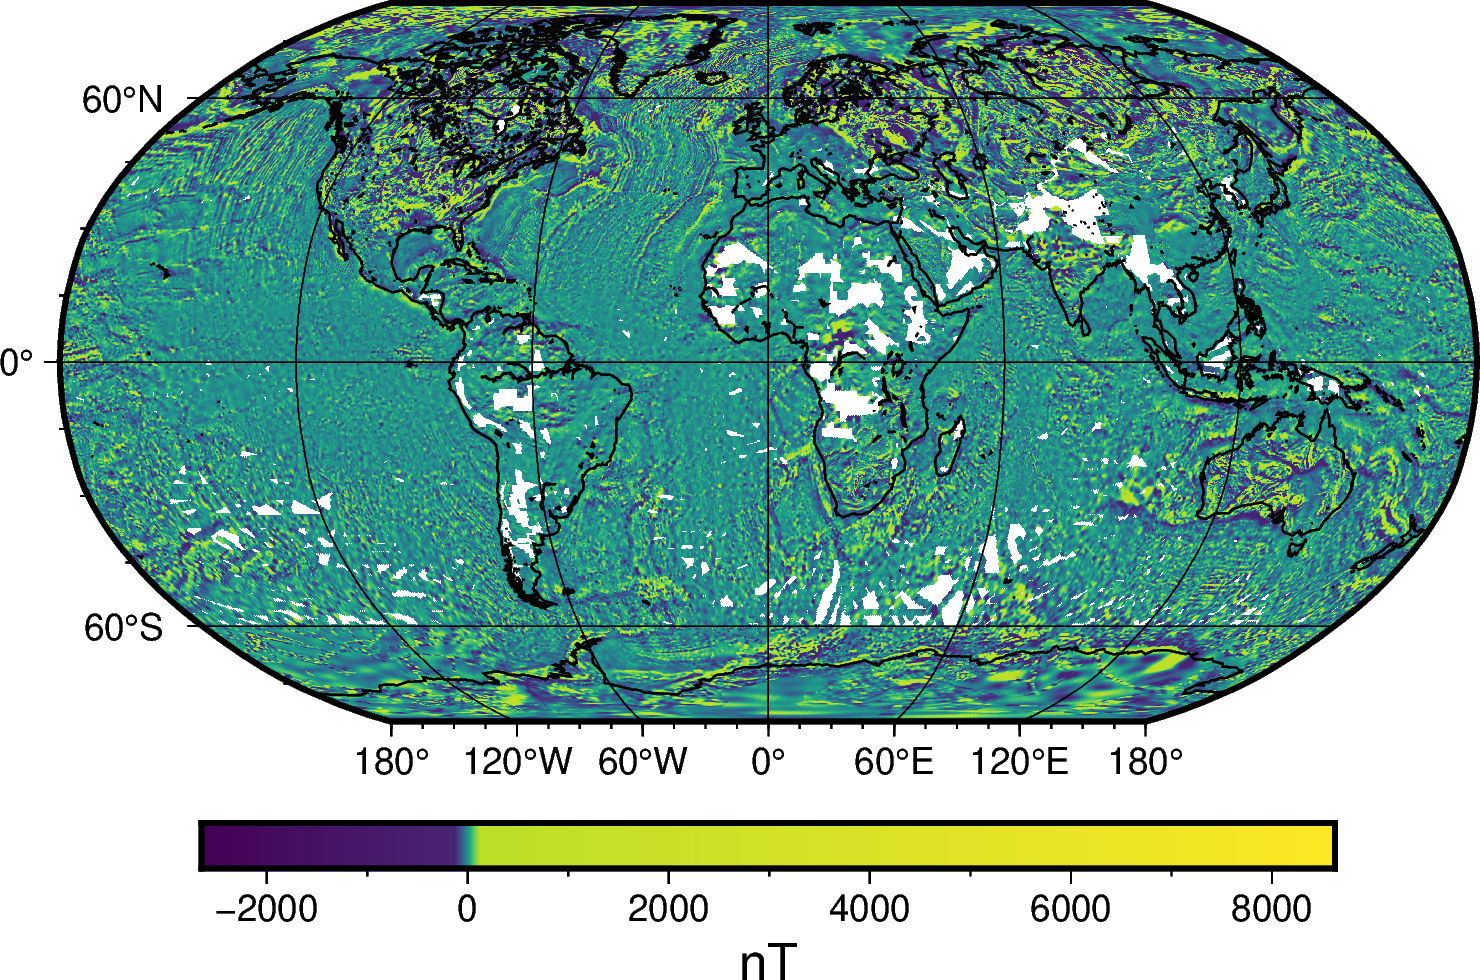

In [9]:
# Make a plot of data using PyGMT
gmt_projection = "N12c"
fig = pygmt.Figure()

pygmt.grd2cpt(grid=mag_downsampled, cmap="viridis", continuous=True)

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        mag_downsampled,
        region="d",
        projection=gmt_projection,
        frame="afg",
        # shading="+a45+n70",
        cmap=True,
        nan_transparent=True,
    )

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["af", "x+lnT"])

fig.show()

## More maps

In [16]:
mag_ridges = mag.copy(deep=True)

mag_ridges = mag_ridges.assign_coords(longitude=mag_ridges.longitude - 180)
mag_ridges

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       ...,
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -89.97 -89.93 -89.9 ... 89.9 89.93 89.97
  * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [17]:
west, east, south, north = (-170, -80, -65, -10)

mag_ridges = mag_ridges.sel(longitude=slice(west, east), latitude=slice(south, north))
mag_ridges

<xarray.DataArray (latitude: 1650, longitude: 2700)>
array([[ -84.55567 ,  -73.10623 ,  -63.144478, ...,   65.32854 ,   64.75809 ,
          63.962345],
       [-120.48137 , -107.97375 ,  -96.975975, ...,   65.56232 ,   65.256035,
          64.80098 ],
       [-152.29797 , -138.407   , -126.152664, ...,   64.19403 ,   64.243645,
          64.19868 ],
       ...,
       [ -11.950057,  -12.023844,  -12.5724  , ...,   72.24478 ,   67.90622 ,
          63.24694 ],
       [ -13.797259,  -14.435614,  -15.499357, ...,   72.75631 ,   68.8097  ,
          64.49115 ],
       [ -15.675214,  -17.058279,  -18.758198, ...,   73.35856 ,   69.80661 ,
          65.84848 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -64.97 -64.93 -64.9 ... -10.07 -10.03 -10.0
  * longitude  (longitude) float64 -170.0 -170.0 -169.9 ... -80.1 -80.07 -80.03
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [12]:
print((west + east) / 2 - 360)
print((south + north) / 2)

-30.0
50.0


In [33]:
region_deg = (west - 360, east - 360, south, north)

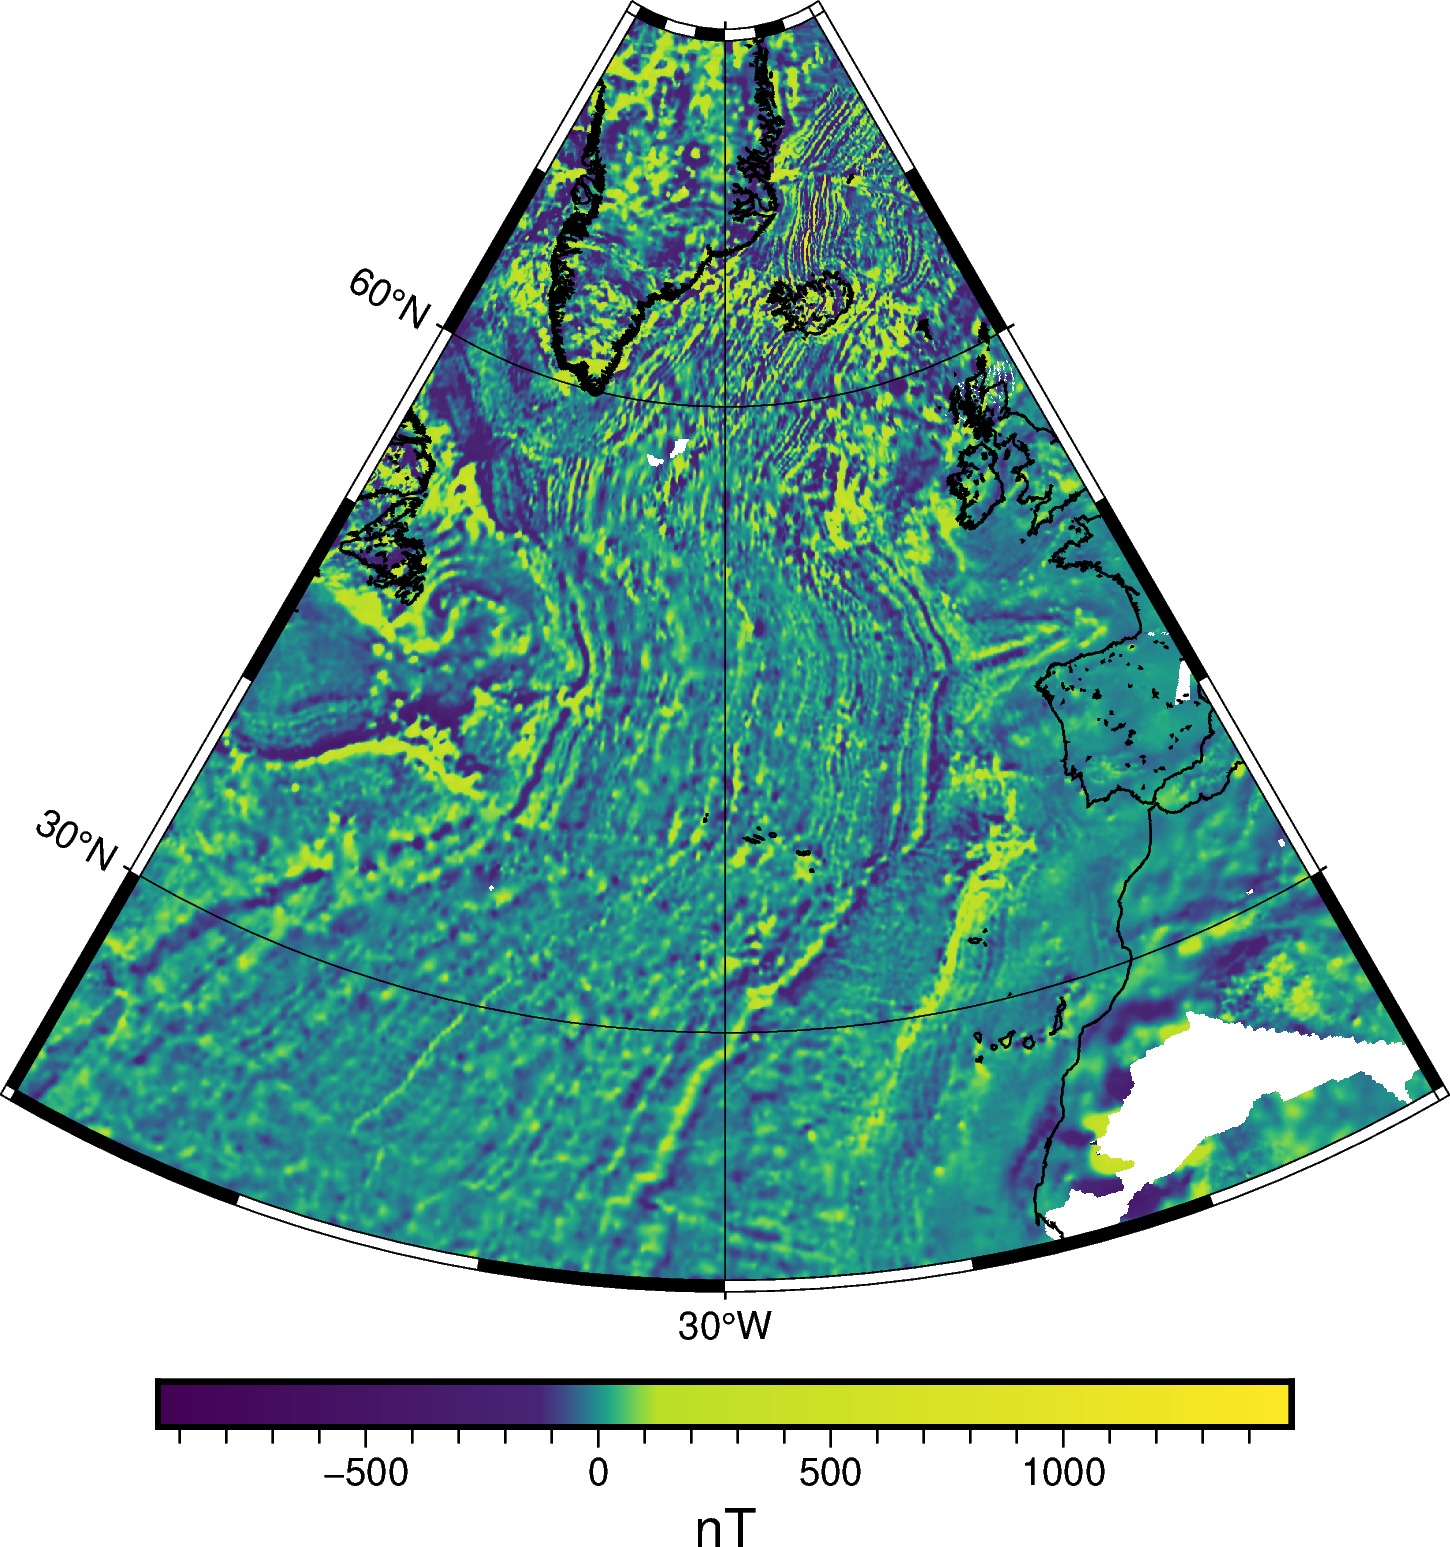

In [35]:
import verde as vd

# Make a plot of data using PyGMT
gmt_projection = "S-30/50/12c"
gmt_projection = f"D-30/50/{int(south)}/{int(north)}/12c"
gmt_projection = f"S-30/90/12c"

fig = pygmt.Figure()

pygmt.grd2cpt(grid=mag_ridges, cmap="viridis", continuous=True)

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        mag_ridges,
        projection=gmt_projection,
        frame="afg",
        # shading="+a45+n70",
        cmap=True,
        nan_transparent=True,
    )

fig.coast(shorelines="0.5p,black", resolution="intermediate")

fig.colorbar(cmap=True, frame=["af", "x+lnT"])

fig.show()